**1. Implement and demonstrate the FIND-S algorithm for finding the most specific
hypothesis based on a given set of training data samples. Read the training data from a.CSV file.**

In [3]:
import csv
a = []
with open('enjoysport.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)

[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

**2. For a given set of training data examples stored in a .CSV file, implement and demonstrate
the Candidate Elimination algorithm to output a description of the set of all hypothesis
consistent with the training examples.**

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv("enjoysport.csv")
concepts = np.array(data.iloc[:, 0:-1])
print("\nInstances are:\n", concepts)
target = np.array(data.iloc[:, -1])
print("\nTarget Values are: ", target)

def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")

    # Clean up the redundant hypotheses in the generic boundary
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and generic_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





**3. Write a program to demonstrate the working of the decision tree based ID3 algorithm.Use an appropriate data set for building the decision tree and apply this knowledge toclassify a new sample.**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#Decision tree classifier model
clf = DecisionTreeClassifier(
    class_weight = None,
    criterion ='entropy',
    max_depth = None,
    max_features= None,
    max_leaf_nodes= None,
    min_impurity_decrease= 0.0,
    min_samples_leaf= 1,
    min_samples_split=2,
    min_weight_fraction_leaf= 0.0,
    random_state = 0,
    splitter = 'best'
)
#Display the results (confusion matrix and accuracy)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[51  2]
 [ 4 86]]


0.958041958041958

**4. Write a program to demonstrate the working of Support Vector Machine by using appropriate data set.**

In [8]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
Iris = pd.read_csv('iris.csv')

# Load the breast cancer dataset
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
# Making predictions on the test set

y_pred = clf.predict(X_test)

# Evaluating the classifier accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.868421052631579


**5. Write a program to implement k- Nearest Neighbor algorithm to classify the iris data set.Print both correct and wrong predictions. (Python ML library can be used for this problem)**

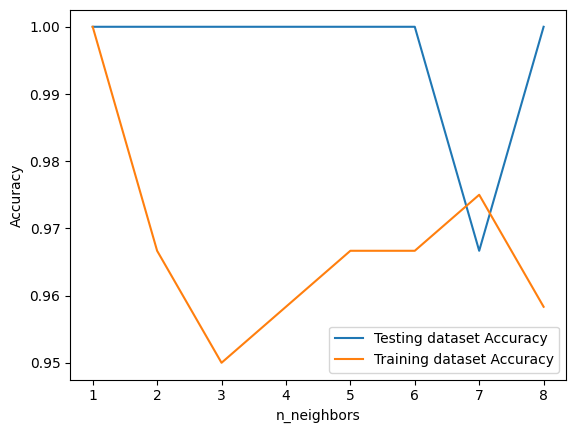

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
print(knn.predict(X_test))
print(knn.score(X_test, y_test))

**6. Write a program to demonstrate the working of  EM algorithm**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


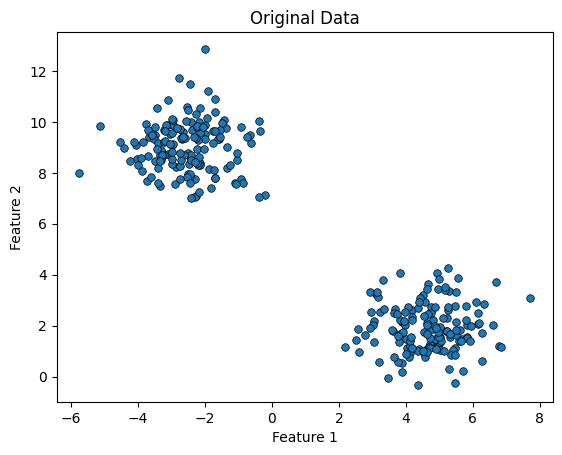

Final means:
[[-2.55143224  9.02835242]
 [ 4.66375945  1.92025297]]

Final covariances:
[[[ 0.93427526 -0.01424697]
  [-0.01424697  0.98747069]]

 [[ 0.97962592  0.039166  ]
  [ 0.039166    0.87508467]]]

Final weights:
[0.5 0.5]


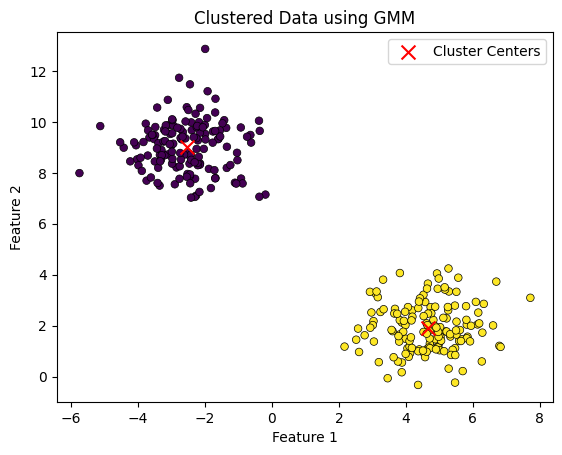

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

def generate_data(num_samples):
    # Generate data from a mixture of two blobs
    data, _ = make_blobs(n_samples=num_samples, centers=2, cluster_std=1.0, random_state=42)
    return data

def plot_data(data, title):
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def main():
    num_samples = 300
    data = generate_data(num_samples)
    plot_data(data, "Original Data")

    # Using scikit-learn Gaussian Mixture Model
    num_clusters = 2
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data)

    # Get the final parameters from the GMM
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    print("Final means:")
    print(means)
    print("\nFinal covariances:")
    print(covariances)
    print("\nFinal weights:")
    print(weights)

    # Plot the data with the learned clusters
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5, c=gmm.predict(data))
    plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title("Clustered Data using GMM")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


**7. Write a python program to implement Naive bayesian Classifier using any appropriate dataset.**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset**

In [10]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd


In [14]:
dataset = pd.read_csv('Mall_Customers.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
dataset.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(200, 5)

In [17]:
x = dataset.iloc[:, [3, 4]].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

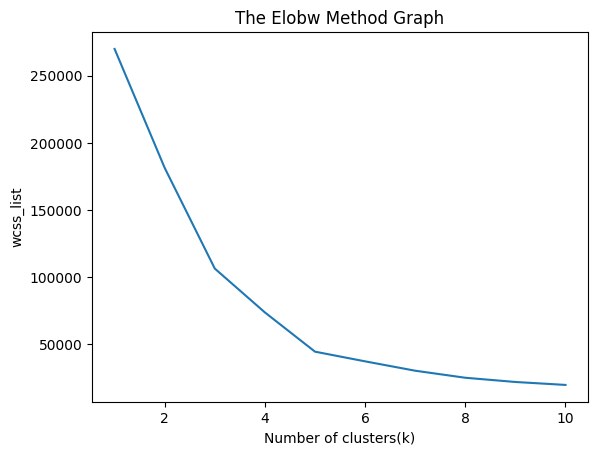

In [18]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [19]:
    #training the K-means model on a dataset
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
    y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


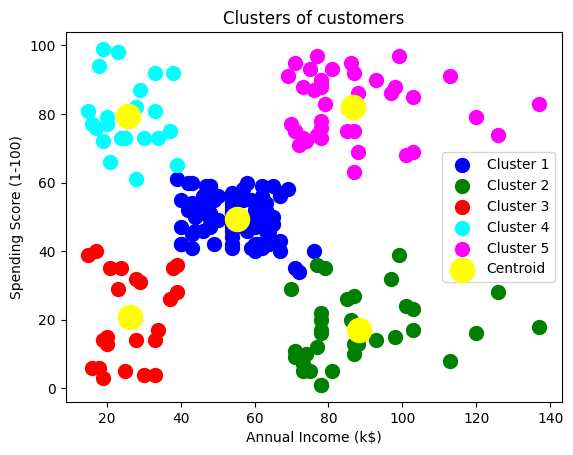

In [20]:
#visulaizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

**9. Write a program to demonstrate the working of Apriori alogirthm**

In [12]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [['bread', 'milk', 'beer'],
                ['bread', 'diapers', 'eggs'],
                ['milk', 'diapers', 'beer', 'cola'],
                ['bread', 'milk', 'diapers', 'beer'],
                ['bread', 'milk', 'eggs']]

# Transform the transaction data to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Print the support for each frequent itemset
print("Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support']])

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the confidence for each association rule
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

Frequent Itemsets:
                 itemsets  support
0                  (beer)      0.6
1                 (bread)      0.8
2               (diapers)      0.6
3                  (eggs)      0.4
4                  (milk)      0.8
5           (bread, beer)      0.4
6         (diapers, beer)      0.4
7            (beer, milk)      0.6
8        (diapers, bread)      0.4
9           (eggs, bread)      0.4
10          (bread, milk)      0.6
11        (diapers, milk)      0.4
12    (bread, beer, milk)      0.4
13  (diapers, beer, milk)      0.4

Association Rules:
       antecedents consequents  support  confidence
0           (beer)      (milk)      0.6        1.00
1           (milk)      (beer)      0.6        0.75
2           (eggs)     (bread)      0.4        1.00
3          (bread)      (milk)      0.6        0.75
4           (milk)     (bread)      0.6        0.75
5    (bread, beer)      (milk)      0.4        1.00
6  (diapers, beer)      (milk)      0.4        1.00
7  (diapers, milk)  

**10.Write a program to implement PCA by using appropriate datasets for the computation**

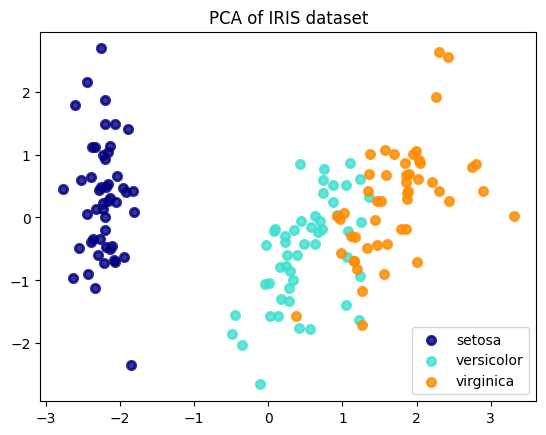

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()
